### Build a DNN using Keras with `RELU` and `ADAM`

#### 1. Load tensorflow (1 Mark)

In [0]:
import tensorflow as tf
import numpy as np

#### 2. Collect Fashion mnist data from tf.keras.datasets (1 Mark)

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()


#### Please run this cell as class names are not included, need to create them to plot the images

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 3(a). Display Shapes of Train and Test sets (0.5 Mark)

In [33]:
train_x.shape

(60000, 28, 28)

In [34]:
test_x.shape

(10000, 28, 28)

#### 3(b). Check how many classes (unique categories) we have in target column (0.5 Mark)

#### Hint: np.unique

In [35]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### 4. Plot/Visualize the first image from the training dataset using matplotlib's imshow and display the class name below the image (2 Marks)

In [0]:
import matplotlib.pyplot as plt

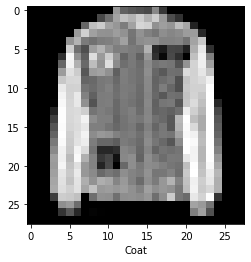

In [49]:
img_num = np.random.randint(0,test_x.shape[0])
plt.imshow(test_x[img_num],cmap='gray')

plt.xlabel(class_names[test_y[img_num]])
plt.show()

#### 5. Change train and test labels into one-hot vectors (1 Mark)

In [0]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

### Build the Graph

#### 6.Initialize model, reshape & batch normalize data (1 Mark)

In [0]:
tf.keras.backend.clear_session()
#initialise the model
model = tf.keras.models.Sequential()
#reshape the input
model.add(tf.keras.layers.Reshape((784,), input_shape = (28,28,)))
#batch normalise the data
model.add(tf.keras.layers.BatchNormalization())

#### 7(a). Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. (1 Mark)

In [0]:
#adding 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
#adding 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#### 7(b). Add a dropout layer with `p=0.25` (1 Mark)

In [0]:
model.add(tf.keras.layers.Dropout(0.25))

#### 8. Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. (1 Mark)

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Compile Model
#### 9. Use `categorical_crossentropy` loss, `adam` optimizer, `accuracy` metric and compile the model. (1 Mark)

In [0]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training
#### 10. Fit your model on train set, using validation_split=0.2, epochs=10 and batch_size=32 and assign it to a variable "hist_model" which can be used to plot loss and accuracy curves using saved history. (5 Marks)

In [63]:
hist_model = model.fit(train_x,train_y, validation_split=0.2, epochs=10, batch_size=32)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 176us/sample - loss: 0.5288 - acc: 0.8111 - val_loss: 0.3896 - val_acc: 0.8542
Epoch 2/10
48000/48000 [==============================] - 8s 166us/sample - loss: 0.4064 - acc: 0.8522 - val_loss: 0.3619 - val_acc: 0.8679
Epoch 3/10
48000/48000 [==============================] - 9s 178us/sample - loss: 0.3673 - acc: 0.8648 - val_loss: 0.3566 - val_acc: 0.8730
Epoch 4/10
48000/48000 [==============================] - 8s 165us/sample - loss: 0.3421 - acc: 0.8736 - val_loss: 0.3350 - val_acc: 0.8788
Epoch 5/10
48000/48000 [==============================] - 8s 163us/sample - loss: 0.3235 - acc: 0.8788 - val_loss: 0.3377 - val_acc: 0.8786
Epoch 6/10
48000/48000 [==============================] - 8s 166us/sample - loss: 0.3077 - acc: 0.8860 - val_loss: 0.3397 - val_acc: 0.8803
Epoch 7/10
48000/48000 [==============================] - 8s 166us/sample - loss: 0.2899 - acc: 0.8917 - val_l

### Model Evaluation

In [0]:
#### 11. Visualize/Plot loss curves for training data, val data and provide your inference (2 Marks)

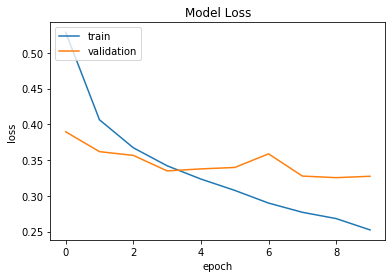

In [74]:
# plot model loss
  plt.plot(hist_model.history['loss'])
  plt.plot(hist_model.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

the model loss for training data has decreased gradually and reached 0.2 where as loss for validation data is fluctuating and reached 0.3
we can still try to decrease the loss using different optimizers.

#### 12. Visualize/Plot accuracy curves for training data, val data and provide your inference (2 Marks)

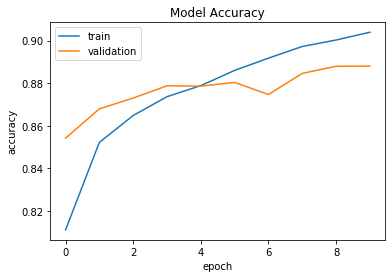

In [73]:
  # plot model accuracy
  plt.plot(hist_model.history['acc'])
  plt.plot(hist_model.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

the accuracy of the model on train data is 90% and the accuracy on validation data is 88.8%. we can try to improve the model accuracy using different activation functions , optimizers, epochs, number of hidden layers, number of neurns

In [0]:
#### 13. Evaluate the above model on test set and report test loss & accuracy (1 Mark)
#### Hint: model.evaluate()

In [75]:
model.evaluate(test_x, test_y, batch_size=32)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3538 - acc: 0.8834


[0.35376439908742907, 0.8834]

the model accuracy on the test data is 88.3% and the loss is 0.3 . we can still try to imrove the accuracy using hyper parameters.

#### 14. Predict the labels for test set and store in a variable named "predictions" (1 Mark)

#### Hint: model.predict()

In [0]:
predictions = model.predict(test_x, batch_size=32) 

#### 15. Write a for loop to visualize, display actual label, predicted label along with class names for 0th, 100th and 200th images in test set.  
#### (3 Marks)

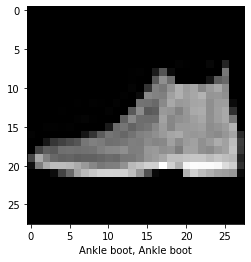

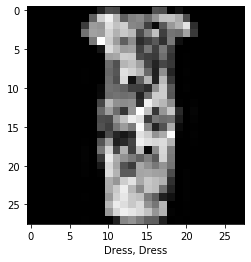

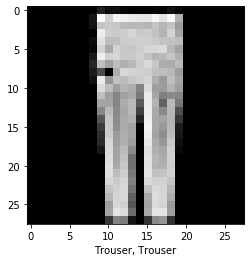

In [106]:
img_num = [0,100,200]
for i in img_num:
  plt.imshow(test_x[i],cmap='gray')
  label = class_names[test_y[i].argmax()]+", " +class_names[predictions[i].argmax()]
  plt.xlabel(label)
  plt.show()